In [1]:
#import library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv files
df= pd.read_csv(r"C:\Users\HP\Downloads\S&P+500+Stock+Prices+2014-2017.csv\S&P 500 Stock Prices 2014-2017.csv")

In [3]:
#preview datatsets df
df.head(100)

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
95,CLX,2014-01-02,92.7500,92.7500,90.6500,91.1600,1353357
96,CL,2014-01-02,64.8900,65.0300,64.0000,64.3000,3004468
97,CMA,2014-01-02,47.2400,47.4300,46.8400,46.8500,1094704
98,CMCSA,2014-01-02,25.9000,25.9500,25.6350,25.7250,19522498


In [4]:
# Display the information of each columns and total rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [5]:
df.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [6]:
# quick overview of numerical tables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,497461.0,8.635227e+01,1.014712e+02,1.62,4.169000e+01,6.497000e+01,98.41,2.044000e+03
high,497464.0,8.713256e+01,1.023121e+02,1.69,4.209000e+01,6.556000e+01,99.23,2.067990e+03
low,497464.0,8.555247e+01,1.005710e+02,1.50,4.128000e+01,6.435370e+01,97.58,2.035110e+03
close,497472.0,8.636908e+01,1.014724e+02,1.59,4.170375e+01,6.498000e+01,98.42,2.049000e+03
volume,497472.0,4.253611e+06,8.232139e+06,0.00,1.080166e+06,2.084896e+06,4271928.00,6.182376e+08


In [7]:
#quick overview of non-numerical tables
df.describe(include='O').T

,count,unique,top,freq
symbol,497472,505,FCX,1007
date,497472,1007,2017-12-18,505


In [8]:
#check for null values
df.isna().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
# number of rows and column
df.shape

(497472, 7)

In [11]:
#fill empty cells in each column with it mean()
df['open'].fillna(df['open'].mean(), inplace=True)
df['high'].fillna(df['high'].mean(), inplace=True)
df['low'].fillna(df['low'].mean(), inplace=True)

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>],
       [<AxesSubplot:title={'center':'volume'}>, <AxesSubplot:>]],
      dtype=object)

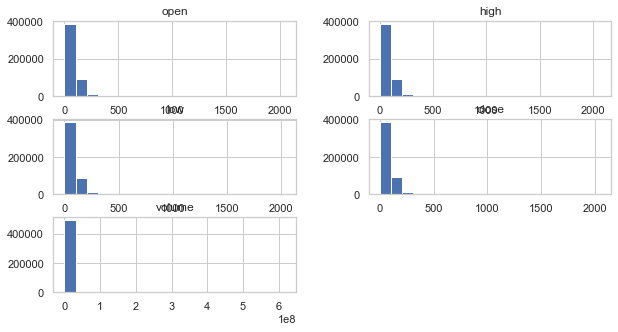

In [12]:
df.hist(figsize=(10,5), bins=20)

In [13]:
#convert date column to date time
df['date']= pd.to_datetime(df['date'])

In [14]:
df['day']= df['date'].dt.day_name()

## Questions

- Which date in the sample saw the largest overall trading volume? On that date, which two stocks were traded most?

- On which day of the week does volume tend to be highest? Lowest?

- On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?

- If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?

### 1. Which date in the sample saw the largest overall trading volume? On that date, which two stocks were traded most?

In [15]:
df.groupby('date')['volume'].sum().sort_values(ascending=False)

date
2015-08-24    4607945196
2016-06-24    4367393052
2015-12-18    4124454411
2016-01-20    4087629753
2016-11-10    4060601612
                 ...    
2014-12-26     894908944
2015-11-27     791154818
2014-12-24     750895627
2015-12-24     736263173
2017-11-24     728261080
Name: volume, Length: 1007, dtype: int64

In [16]:
highest_day = df[df['date']=='2015-08-24']

In [17]:
highest_day.groupby('symbol')['volume'].sum().sort_values(ascending=False).head(2)

symbol
BAC     214649482
AAPL    162206292
Name: volume, dtype: int64

In [18]:
highest_day.nlargest(2,'volume')

,symbol,date,open,high,low,close,volume,day
201266,BAC,2015-08-24,15.02,15.98,14.6,15.29,214649482,Monday
201209,AAPL,2015-08-24,94.87,108.80,92.0,103.12,162206292,Monday


### 2.On which day of the week does volume tend to be highest? Lowest?

In [17]:
df.groupby('day')['volume'].sum().sort_values(ascending=False)

day
Wednesday    441712704746
Friday       440535234884
Thursday     431160024905
Tuesday      428297652485
Monday       374346703519
Name: volume, dtype: int64

<AxesSubplot:title={'center':'Volume by Week Day'}, xlabel='Day Of The week', ylabel='Volume'>

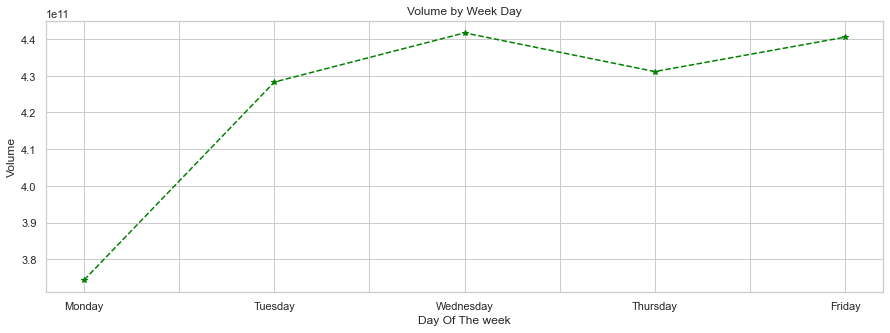

In [19]:
df.groupby('day')['volume'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday']).plot(kind='line', xlabel='Day Of The week', ylabel='Volume',title='Volume by Week Day',color='Green', marker='*', linestyle='--', figsize= (15,5))

### 3.On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?

In [20]:
amazon= df[df['symbol']=='AMZN']

In [21]:
amazon

,symbol,date,open,high,low,close,volume,day
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,Thursday
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,Friday
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,Monday
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,Tuesday
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,Wednesday
...,...,...,...,...,...,...,...,...
494984,AMZN,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,Friday
495489,AMZN,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,Tuesday
495994,AMZN,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,Wednesday
496499,AMZN,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,Thursday


In [22]:
amazon['diffrence']= amazon['high'] -amazon['low']

In [23]:
amazon.groupby('date')['diffrence'].sum().sort_values(ascending=False)

date
2017-06-09    85.99
2016-11-10    61.13
2017-10-27    55.03
2015-07-24    51.22
2017-11-29    49.61
              ...  
2015-03-24     2.97
2014-12-31     2.97
2014-11-26     2.90
2014-06-03     2.85
2014-08-19     2.80
Name: diffrence, Length: 1007, dtype: float64

In [30]:
amazon.nlargest(1,'diffrence')

,symbol,date,open,high,low,close,volume,day,diffrence
426023,AMZN,2017-06-09,1012.5,1012.99,927.0,978.31,7647692,Friday,85.99


In [24]:
amazon.nsmallest(1,'diffrence')

,symbol,date,open,high,low,close,volume,day,diffrence
76587,AMZN,2014-08-19,334.87,335.81,333.01,335.13,1714120,Tuesday,2.8


### 4. If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?

In [25]:
df_2014= df[df['date']=='2014-01-02']

In [26]:
df_2017= df[df['date']=='2017-12-29']

In [27]:
df_open= df_2014.iloc[:,[0,2]]

In [28]:
df_close=df_2017.iloc[:,[0,5]]

In [29]:
df_open

,symbol,open
0,AAL,25.0700
1,AAPL,79.3828
2,AAP,110.3600
3,ABBV,52.1200
4,ABC,70.1100
...,...,...
478,XYL,34.3900
479,YUM,75.3800
480,ZBH,92.6300
481,ZION,29.9000


In [31]:
df_close

,symbol,close
496967,AAL,52.03
496968,AAPL,169.23
496969,AAP,99.69
496970,ABBV,96.71
496971,ABC,91.82
...,...,...
497467,XYL,68.20
497468,YUM,81.61
497469,ZBH,120.67
497470,ZION,50.83


In [32]:
df_total= df_open.merge(df_close, on='symbol')
df_total

,symbol,open,close
0,AAL,25.0700,52.03
1,AAPL,79.3828,169.23
2,AAP,110.3600,99.69
3,ABBV,52.1200,96.71
4,ABC,70.1100,91.82
...,...,...,...
478,XYL,34.3900,68.20
479,YUM,75.3800,81.61
480,ZBH,92.6300,120.67
481,ZION,29.9000,50.83


In [33]:
diff= (df_total['close']-df_total['open'])*100.0
df_total['percentage']= diff/df_total['open']
df_total

,symbol,open,close,percentage
0,AAL,25.0700,52.03,107.538891
1,AAPL,79.3828,169.23,113.182201
2,AAP,110.3600,99.69,-9.668358
3,ABBV,52.1200,96.71,85.552571
4,ABC,70.1100,91.82,30.965625
...,...,...,...,...
478,XYL,34.3900,68.20,98.313463
479,YUM,75.3800,81.61,8.264792
480,ZBH,92.6300,120.67,30.270971
481,ZION,29.9000,50.83,70.000000


In [34]:
df_total.nlargest(3,'percentage')

,symbol,open,close,percentage
330,NVDA,15.92,193.50,1115.452261
51,AVGO,52.85,256.90,386.092715
146,EA,22.90,105.06,358.777293


In [35]:
df_total.nsmallest(3,'percentage')

,symbol,open,close,percentage
90,CHK,27.07,3.96,-85.371260
385,RRC,83.13,17.06,-79.477926
131,DISCA,90.21,22.38,-75.191220


In [103]:
month_30 =df[np.logical_and((df['date'].dt.day).isin([30]),(df['date'].dt.month).isin([4,6,9,11]))]
month_31 =df[np.logical_and((df['date'].dt.day).isin([31]),(df['date'].dt.month).isin([1,3,5,7,8,10,12]))]
month_feb = df[np.logical_and((df['date'].dt.day).isin([29]),(df['date'].dt.month).isin([2]))]
month_end = pd.concat([month_30,month_31,month_feb],ignore_index= True)
month_feb

,symbol,date,open,high,low,close,volume,day
264963,AAL,2016-02-29,40.77,41.34,40.500,41.00,5791341,Monday
264964,AAPL,2016-02-29,96.86,98.23,96.650,96.69,35216277,Monday
264965,AAP,2016-02-29,150.00,151.06,148.380,148.44,862224,Monday
264966,ABBV,2016-02-29,55.87,56.00,54.470,54.61,8395104,Monday
264967,ABC,2016-02-29,87.27,87.51,86.435,86.62,2595945,Monday
...,...,...,...,...,...,...,...,...
265454,XYL,2016-02-29,37.77,37.86,37.410,37.41,1226932,Monday
265455,YUM,2016-02-29,71.31,73.37,71.220,72.47,5599058,Monday
265456,ZBH,2016-02-29,97.50,98.22,96.660,96.81,1495610,Monday
265457,ZION,2016-02-29,21.72,21.83,21.310,21.32,2989449,Monday


In [105]:
selected_symbols = month_end[month_end['symbol'].isin(['AMZN','NVDA','AAPL'])]
selected_symbols['month']= selected_symbols['date'].dt.month
selected_symbols['year']= selected_symbols['date'].dt.year
selected_symbols.sort_values(['symbol','year','month'],ascending=[True,True,True]).tail()

,symbol,date,open,high,low,close,volume,day,month,year
5260,NVDA,2017-06-30,147.38,147.93,143.50,144.56,18276526,Friday,6,2017
14155,NVDA,2017-07-31,164.94,166.40,160.62,162.51,13991802,Monday,7,2017
14658,NVDA,2017-08-31,166.50,169.60,166.20,169.44,15317105,Thursday,8,2017
15162,NVDA,2017-10-31,205.13,207.89,204.90,206.81,10297707,Tuesday,10,2017
5764,NVDA,2017-11-30,199.20,202.68,196.65,200.71,20594199,Thursday,11,2017


In [ ]:
month_end

In [40]:
g= df_total.corr()
g

,open,close,percentage
open,1.000000,0.887632,-0.055228
close,0.887632,1.000000,0.250437
percentage,-0.055228,0.250437,1.000000


<AxesSubplot:>

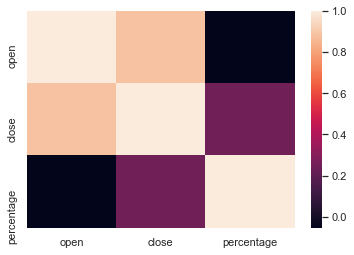

In [39]:
sns.heatmap(g)